In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cassandra23-ps-2/dataset/sample_submissions.csv
/kaggle/input/cassandra23-ps-2/dataset/train_data.csv
/kaggle/input/cassandra23-ps-2/dataset/test_data.csv


In [2]:
train_df=pd.read_csv("/kaggle/input/cassandra23-ps-2/dataset/train_data.csv")
test_df=pd.read_csv("/kaggle/input/cassandra23-ps-2/dataset/test_data.csv")

In [3]:
train_df.head()

,UID,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,actual_time
0,lWYYrbNEdf,2018-09-15 02:23:18.656742,thanos::sroute:9d8ed3f7-a8af-4393-ad7a-c57a720...,FTL,trip-153697819865649878,IND832109AAB,Jamshedpur_Central_I_3 (Jharkhand),IND834002AAB,Ranchi_Hub (Jharkhand),2018-09-15 02:23:18.656742,...,2018-09-15 04:45:23,158.807515,778.672716,1228.735753,2.782826,77.988686,20.793472,28.475783,3.292773,100.0
1,iNJcHQlPCm,2018-09-30 15:07:48.971326,thanos::sroute:b9142a73-d68f-46ec-9afc-d145479...,FTL,trip-153832006897106333,IND422011AAD,Nashik_TgrniaRD_I (Maharashtra),IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),2018-09-30 22:38:13.903069,...,2018-10-01 05:38:30,81.388109,227.479029,NaN,3.625248,68.517914,18.787231,34.612259,4.277350,61.0
2,U6N0M43qwR,2018-09-23 22:15:46.635975,thanos::sroute:883e99fa-50a3-40e0-a2e2-9b12ed6...,FTL,trip-153774094663572416,IND845305AAA,Raxaul_KairiyaT_D (Bihar),NaN,Muzaffrpur_Bbganj_I (Bihar),2018-09-24 03:56:37.016232,...,2018-09-24 09:21:30,134.486898,400.072069,1188.943158,4.415969,70.475386,24.371978,29.867950,5.322072,69.0
3,RrJUneuYNj,2018-09-21 05:11:44.833176,thanos::sroute:96a80600-40e1-436b-9161-fa68f9e...,FTL,trip-153750670483274503,IND842001AAA,Muzaffrpur_Bbganj_I (Bihar),IND854326AAB,Purnia_Central_H_2 (Bihar),2018-09-22 10:08:32.593022,...,2018-09-22 14:09:17,262.866674,510.123878,999.421258,2.946647,101.876844,19.588977,27.794019,4.265799,300.0
4,7QLdD7iRC9,2018-09-18 01:10:49.936747,thanos::sroute:b43ec86d-59c1-452c-b4a9-807d357...,FTL,trip-153723305402762987,IND411033AAA,Pune_Tathawde_H (Maharashtra),IND501359AAE,Hyderabad_Shamshbd_H (Telangana),2018-09-18 01:10:49.936747,...,2018-09-18 12:14:05,379.389280,NaN,NaN,1.998790,46.571301,22.671495,26.971844,3.553652,286.0


In [4]:
train_df.isnull().sum()

UID                                   0
trip_creation_time                 3515
route_schedule_uuid                2895
route_type                            0
trip_uuid                             0
source_center                         0
source_name                           0
destination_center                  803
destination_name                      0
od_start_time                         0
od_end_time                         720
start_scan_to_end_scan                0
is_cutoff                             0
cutoff_factor                         0
cutoff_timestamp                    930
actual_distance_to_destination        0
osrm_time                         14432
osrm_distance                     14432
factor                             1644
segment_actual_time                   0
segment_osrm_time                     0
segment_osrm_distance                 0
segment_factor                     1159
actual_time                           0
dtype: int64

In [5]:
train_df['UID'].count()

72158

In [6]:
import seaborn as sns

<AxesSubplot:>

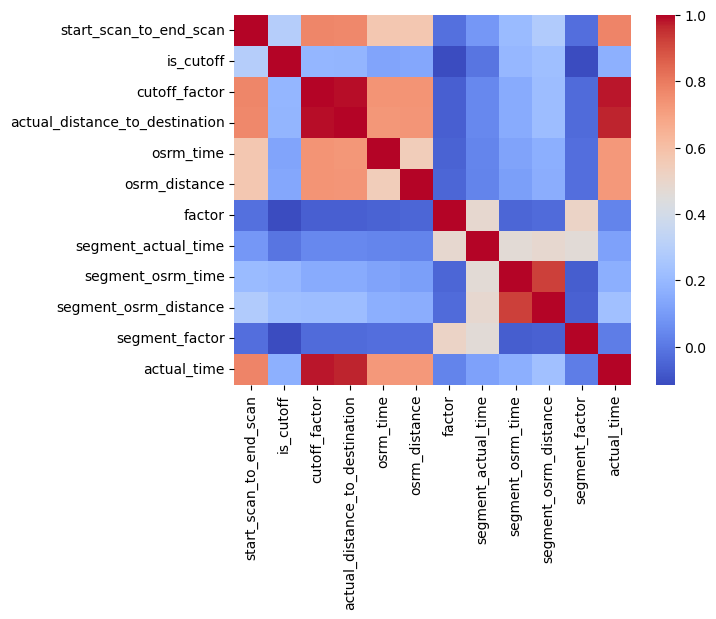

In [7]:
sns.heatmap(train_df.corr(),cmap='coolwarm')

In [8]:
train_df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,actual_time
count,72158.000000,72158.000000,72158.000000,57726.000000,57726.000000,70514.000000,72158.000000,72158.000000,72158.000000,70999.000000,72158.000000
mean,1191.604676,233.406344,301.826483,645.031637,869.045744,2.559982,46.551549,22.444871,27.692491,3.002839,418.200934
std,1053.164936,345.952914,349.694923,420.347151,572.612453,1.739212,54.395587,16.182091,19.902876,4.423817,600.323169
min,32.280981,9.000000,9.135918,20.768357,14.965570,0.299470,-236.341748,0.003620,0.003119,-6.048567,9.000000
25%,390.701365,22.000000,84.076054,326.193956,431.585088,1.945478,28.407258,15.130634,17.454055,1.915661,51.000000
50%,727.355873,66.000000,152.478371,552.826964,742.508270,2.303918,39.147018,20.765332,27.240302,2.504303,132.000000
75%,1875.555264,286.000000,359.922622,868.111572,1176.440741,2.769924,52.721692,26.848582,33.697034,3.282884,513.000000
max,5271.669855,1914.000000,1949.210403,3186.653166,4156.700085,77.381429,3060.652522,1617.726759,2195.845793,362.559369,4154.000000


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72158 entries, 0 to 72157
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   UID                             72158 non-null  object 
 1   trip_creation_time              68643 non-null  object 
 2   route_schedule_uuid             69263 non-null  object 
 3   route_type                      72158 non-null  object 
 4   trip_uuid                       72158 non-null  object 
 5   source_center                   72158 non-null  object 
 6   source_name                     72158 non-null  object 
 7   destination_center              71355 non-null  object 
 8   destination_name                72158 non-null  object 
 9   od_start_time                   72158 non-null  object 
 10  od_end_time                     71438 non-null  object 
 11  start_scan_to_end_scan          72158 non-null  float64
 12  is_cutoff                       

<AxesSubplot:>

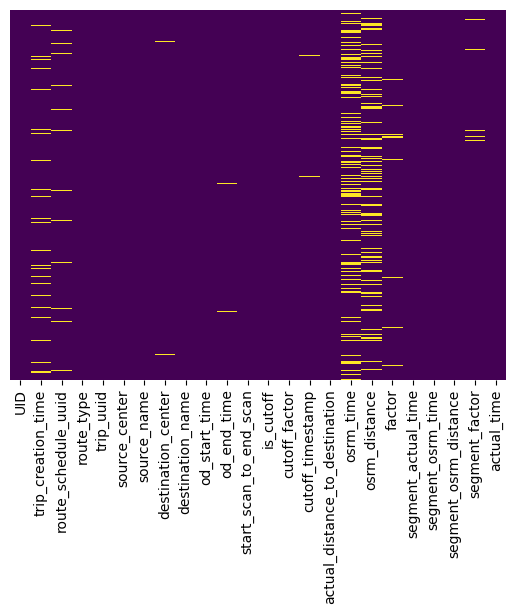

In [10]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
train_df.isnull().mean()

UID                               0.000000
trip_creation_time                0.048713
route_schedule_uuid               0.040120
route_type                        0.000000
trip_uuid                         0.000000
source_center                     0.000000
source_name                       0.000000
destination_center                0.011128
destination_name                  0.000000
od_start_time                     0.000000
od_end_time                       0.009978
start_scan_to_end_scan            0.000000
is_cutoff                         0.000000
cutoff_factor                     0.000000
cutoff_timestamp                  0.012888
actual_distance_to_destination    0.000000
osrm_time                         0.200006
osrm_distance                     0.200006
factor                            0.022783
segment_actual_time               0.000000
segment_osrm_time                 0.000000
segment_osrm_distance             0.000000
segment_factor                    0.016062
actual_time

In [12]:
train_df['trip_creation_time'].count()

68643

In [13]:
def impute_nan(train_df,variable,mean):
    train_df[variable+"_mean"]=train_df[variable].fillna(mean)

In [14]:
mean=train_df.osrm_distance.mean()
impute_nan(train_df,'osrm_distance',mean)


In [15]:
mean=test_df.osrm_distance.mean()
impute_nan(test_df,'osrm_distance',mean)

In [16]:
mean=train_df.osrm_time.mean()
impute_nan(train_df,'osrm_time',mean)

In [17]:
mean=test_df.osrm_time.mean()
impute_nan(test_df,'osrm_time',mean)

In [18]:
train_df.drop(['route_schedule_uuid','source_center','destination_center','destination_name','source_name','osrm_time','osrm_distance','UID','trip_uuid'],axis=1,inplace=True)
test_df.drop(['route_schedule_uuid','source_center','destination_center','destination_name','source_name','osrm_time','osrm_distance','trip_uuid'],axis=1,inplace=True)

In [19]:
train_df['route_type'].unique()

array(['FTL', 'Carting'], dtype=object)

In [20]:
train_df.head()

,trip_creation_time,route_type,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,actual_time,osrm_distance_mean,osrm_time_mean
0,2018-09-15 02:23:18.656742,FTL,2018-09-15 02:23:18.656742,2018-09-15 06:33:35.824186,713.521495,True,44,2018-09-15 04:45:23,158.807515,2.782826,77.988686,20.793472,28.475783,3.292773,100.0,1228.735753,778.672716
1,2018-09-30 15:07:48.971326,FTL,2018-09-30 22:38:13.903069,2018-10-01 06:48:37.637477,902.759458,True,22,2018-10-01 05:38:30,81.388109,3.625248,68.517914,18.787231,34.612259,4.277350,61.0,869.045744,227.479029
2,2018-09-23 22:15:46.635975,FTL,2018-09-24 03:56:37.016232,2018-09-24 11:15:00.826140,923.666146,True,22,2018-09-24 09:21:30,134.486898,4.415969,70.475386,24.371978,29.867950,5.322072,69.0,1188.943158,400.072069
3,2018-09-21 05:11:44.833176,FTL,2018-09-22 10:08:32.593022,2018-09-22 19:17:22.242888,705.451567,True,176,2018-09-22 14:09:17,262.866674,2.946647,101.876844,19.588977,27.794019,4.265799,300.0,999.421258,510.123878
4,2018-09-18 01:10:49.936747,FTL,2018-09-18 01:10:49.936747,2018-09-18 17:58:48.449251,1109.682268,True,198,2018-09-18 12:14:05,379.389280,1.998790,46.571301,22.671495,26.971844,3.553652,286.0,869.045744,645.031637


<AxesSubplot:>

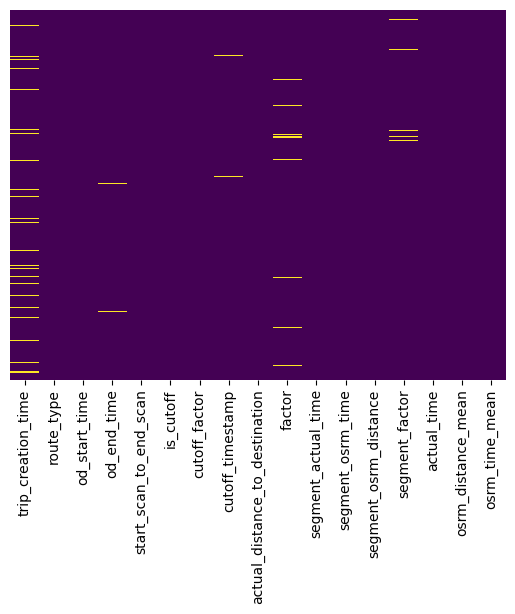

In [21]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [22]:
train_df['is_cutoff'].unique()

array([ True, False])

In [23]:
is_cutoff_dummies=pd.get_dummies(train_df['is_cutoff'])
train_df=pd.concat([train_df,is_cutoff_dummies],axis=1)

test_is_cutoff_dummies=pd.get_dummies(test_df['is_cutoff'])
test_df=pd.concat([test_df,test_is_cutoff_dummies],axis=1)



In [24]:
route_type_dummies=pd.get_dummies(train_df['route_type'])
train_df=pd.concat([train_df,route_type_dummies],axis=1)

test_route_type_dummies=pd.get_dummies(test_df['route_type'])
test_df=pd.concat([test_df,test_route_type_dummies],axis=1)


In [25]:
train_df.drop(['route_type','is_cutoff'],axis=1,inplace=True)
test_df.drop(['route_type','is_cutoff'],axis=1,inplace=True)

In [26]:
train_df.head()

,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,actual_time,osrm_distance_mean,osrm_time_mean,False,True,Carting,FTL
0,2018-09-15 02:23:18.656742,2018-09-15 02:23:18.656742,2018-09-15 06:33:35.824186,713.521495,44,2018-09-15 04:45:23,158.807515,2.782826,77.988686,20.793472,28.475783,3.292773,100.0,1228.735753,778.672716,0,1,0,1
1,2018-09-30 15:07:48.971326,2018-09-30 22:38:13.903069,2018-10-01 06:48:37.637477,902.759458,22,2018-10-01 05:38:30,81.388109,3.625248,68.517914,18.787231,34.612259,4.277350,61.0,869.045744,227.479029,0,1,0,1
2,2018-09-23 22:15:46.635975,2018-09-24 03:56:37.016232,2018-09-24 11:15:00.826140,923.666146,22,2018-09-24 09:21:30,134.486898,4.415969,70.475386,24.371978,29.867950,5.322072,69.0,1188.943158,400.072069,0,1,0,1
3,2018-09-21 05:11:44.833176,2018-09-22 10:08:32.593022,2018-09-22 19:17:22.242888,705.451567,176,2018-09-22 14:09:17,262.866674,2.946647,101.876844,19.588977,27.794019,4.265799,300.0,999.421258,510.123878,0,1,0,1
4,2018-09-18 01:10:49.936747,2018-09-18 01:10:49.936747,2018-09-18 17:58:48.449251,1109.682268,198,2018-09-18 12:14:05,379.389280,1.998790,46.571301,22.671495,26.971844,3.553652,286.0,869.045744,645.031637,0,1,0,1


<AxesSubplot:>

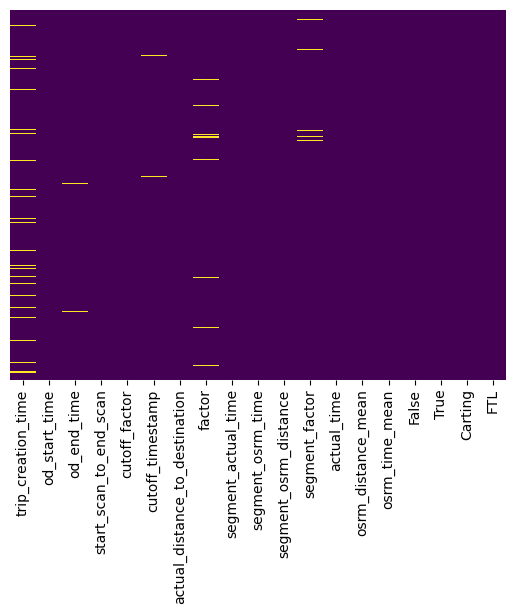

In [27]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [28]:
mean=train_df.segment_factor.mean()
impute_nan(train_df,'segment_factor',mean)
train_df.drop(['segment_factor'],axis=1,inplace=True)

In [29]:
mean=test_df.segment_factor.mean()
impute_nan(test_df,'segment_factor',mean)
test_df.drop(['segment_factor'],axis=1,inplace=True)

In [30]:
mean=train_df.factor.mean()
impute_nan(train_df,'factor',mean)
train_df.drop(['factor'],axis=1,inplace=True)

In [31]:
mean=test_df.factor.mean()
impute_nan(test_df,'factor',mean)
test_df.drop(['factor'],axis=1,inplace=True)

<AxesSubplot:>

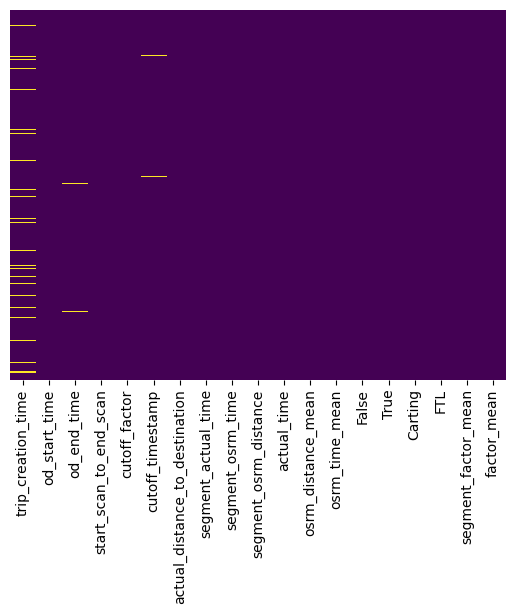

In [32]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [33]:
train_df['trip_creation_time'].fillna('2018-09-15 02:23:18.656742',inplace=True)

In [34]:
train_df['od_end_time'].fillna('2018-09-15 06:33:35.824186',inplace=True)

In [35]:
train_df['cutoff_timestamp'].fillna('2018-09-15 04:45:23',inplace=True)

In [36]:
train_df['trip_creation_time'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
72153    False
72154    False
72155    False
72156    False
72157    False
Name: trip_creation_time, Length: 72158, dtype: bool

<AxesSubplot:>

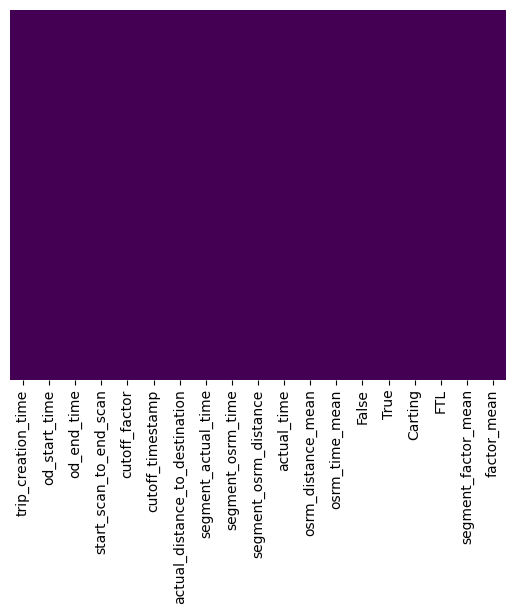

In [37]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [38]:
train_df.head()

,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,segment_actual_time,segment_osrm_time,segment_osrm_distance,actual_time,osrm_distance_mean,osrm_time_mean,False,True,Carting,FTL,segment_factor_mean,factor_mean
0,2018-09-15 02:23:18.656742,2018-09-15 02:23:18.656742,2018-09-15 06:33:35.824186,713.521495,44,2018-09-15 04:45:23,158.807515,77.988686,20.793472,28.475783,100.0,1228.735753,778.672716,0,1,0,1,3.292773,2.782826
1,2018-09-30 15:07:48.971326,2018-09-30 22:38:13.903069,2018-10-01 06:48:37.637477,902.759458,22,2018-10-01 05:38:30,81.388109,68.517914,18.787231,34.612259,61.0,869.045744,227.479029,0,1,0,1,4.277350,3.625248
2,2018-09-23 22:15:46.635975,2018-09-24 03:56:37.016232,2018-09-24 11:15:00.826140,923.666146,22,2018-09-24 09:21:30,134.486898,70.475386,24.371978,29.867950,69.0,1188.943158,400.072069,0,1,0,1,5.322072,4.415969
3,2018-09-21 05:11:44.833176,2018-09-22 10:08:32.593022,2018-09-22 19:17:22.242888,705.451567,176,2018-09-22 14:09:17,262.866674,101.876844,19.588977,27.794019,300.0,999.421258,510.123878,0,1,0,1,4.265799,2.946647
4,2018-09-18 01:10:49.936747,2018-09-18 01:10:49.936747,2018-09-18 17:58:48.449251,1109.682268,198,2018-09-18 12:14:05,379.389280,46.571301,22.671495,26.971844,286.0,869.045744,645.031637,0,1,0,1,3.553652,1.998790


In [39]:
train_df['trip_creation_time'] = pd.to_datetime(train_df['trip_creation_time']) 
train_df['od_start_time'] = pd.to_datetime(train_df['od_start_time'])
train_df['od_end_time'] = pd.to_datetime(train_df['od_end_time'])
train_df['cutoff_timestamp'] = pd.to_datetime(train_df['cutoff_timestamp'])

test_df['trip_creation_time'] = pd.to_datetime(test_df['trip_creation_time']) 
test_df['od_start_time'] = pd.to_datetime(test_df['od_start_time'])
test_df['od_end_time'] = pd.to_datetime(test_df['od_end_time'])
test_df['cutoff_timestamp'] = pd.to_datetime(test_df['cutoff_timestamp'])

In [40]:
train_df['od_start_year'] = train_df['od_start_time'].dt.year.astype('int64')
train_df['od_start_month'] = train_df['od_start_time'].dt.month.astype('int64')
train_df['od_start_day'] = train_df['od_start_time'].dt.day.astype('int64')
train_df['od_start_hour'] = train_df['od_start_time'].dt.hour.astype('int64')
train_df['od_start_hour'] = train_df['od_start_time'].dt.minute.astype('int64')
train_df['od_start_hour'] = train_df['od_start_time'].dt.second.astype('int64')

test_df['od_start_year'] = test_df['od_start_time'].dt.year.astype('int64')
test_df['od_start_month'] = test_df['od_start_time'].dt.month.astype('int64')
test_df['od_start_day'] = test_df['od_start_time'].dt.day.astype('int64')
test_df['od_start_hour'] = test_df['od_start_time'].dt.hour.astype('int64')
test_df['od_start_hour'] = test_df['od_start_time'].dt.minute.astype('int64')
test_df['od_start_hour'] = test_df['od_start_time'].dt.second.astype('int64')

In [41]:
train_df['trip_creation_year'] = train_df['trip_creation_time'].dt.year.astype('int64')
train_df['trip_creation_month'] = train_df['trip_creation_time'].dt.month.astype('int64')
train_df['trip_creation_day'] = train_df['trip_creation_time'].dt.day.astype('int64')
train_df['trip_creation_hour'] = train_df['trip_creation_time'].dt.hour.astype('int64')
train_df['trip_creation_hour'] = train_df['trip_creation_time'].dt.minute.astype('int64')
train_df['trip_creation_hour'] = train_df['trip_creation_time'].dt.second.astype('int64')

test_df['trip_creation_year'] = test_df['trip_creation_time'].dt.year.astype('int64')
test_df['trip_creation_month'] = test_df['trip_creation_time'].dt.month.astype('int64')
test_df['trip_creation_day'] = test_df['trip_creation_time'].dt.day.astype('int64')
test_df['trip_creation_hour'] = test_df['trip_creation_time'].dt.hour.astype('int64')
test_df['trip_creation_hour'] = test_df['trip_creation_time'].dt.minute.astype('int64')
test_df['trip_creation_hour'] = test_df['trip_creation_time'].dt.second.astype('int64')

In [42]:
train_df['od_end_year'] = train_df['od_end_time'].dt.year.astype('int64')
train_df['od_end_month'] = train_df['od_end_time'].dt.month.astype('int64')
train_df['od_end_day'] = train_df['od_end_time'].dt.day.astype('int64')
train_df['od_end_hour'] = train_df['od_end_time'].dt.hour.astype('int64')
train_df['od_end_hour'] = train_df['od_end_time'].dt.minute.astype('int64')
train_df['od_end_hour'] = train_df['od_end_time'].dt.second.astype('int64')

test_df['od_end_year'] = test_df['od_end_time'].dt.year.astype('int64')
test_df['od_end_month'] = test_df['od_end_time'].dt.month.astype('int64')
test_df['od_end_day'] = test_df['od_end_time'].dt.day.astype('int64')
test_df['od_end_hour'] = test_df['od_end_time'].dt.hour.astype('int64')
test_df['od_end_hour'] = test_df['od_end_time'].dt.minute.astype('int64')
test_df['od_end_hour'] = test_df['od_end_time'].dt.second.astype('int64')

In [43]:
train_df['cutoff_timestamp_year'] = train_df['cutoff_timestamp'].dt.year.astype('int64')
train_df['cutoff_timestamp_month'] = train_df['cutoff_timestamp'].dt.month.astype('int64')
train_df['cutoff_timestamp_day'] = train_df['cutoff_timestamp'].dt.day.astype('int64')
train_df['cutoff_timestamp_hour'] = train_df['cutoff_timestamp'].dt.hour.astype('int64')
train_df['cutoff_timestamp_hour'] = train_df['cutoff_timestamp'].dt.minute.astype('int64')
train_df['cutoff_timestamp_hour'] = train_df['cutoff_timestamp'].dt.second.astype('int64')

test_df['cutoff_timestamp_year'] = test_df['cutoff_timestamp'].dt.year.astype('int64')
test_df['cutoff_timestamp_month'] = test_df['cutoff_timestamp'].dt.month.astype('int64')
test_df['cutoff_timestamp_day'] = test_df['cutoff_timestamp'].dt.day.astype('int64')
test_df['cutoff_timestamp_hour'] = test_df['cutoff_timestamp'].dt.hour.astype('int64')
test_df['cutoff_timestamp_hour'] = test_df['cutoff_timestamp'].dt.minute.astype('int64')
test_df['cutoff_timestamp_hour'] = test_df['cutoff_timestamp'].dt.second.astype('int64')


In [44]:
train_df.head()

,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,segment_actual_time,segment_osrm_time,segment_osrm_distance,...,trip_creation_day,trip_creation_hour,od_end_year,od_end_month,od_end_day,od_end_hour,cutoff_timestamp_year,cutoff_timestamp_month,cutoff_timestamp_day,cutoff_timestamp_hour
0,2018-09-15 02:23:18.656742,2018-09-15 02:23:18.656742,2018-09-15 06:33:35.824186,713.521495,44,2018-09-15 04:45:23,158.807515,77.988686,20.793472,28.475783,...,15,18,2018,9,15,35,2018,9,15,23
1,2018-09-30 15:07:48.971326,2018-09-30 22:38:13.903069,2018-10-01 06:48:37.637477,902.759458,22,2018-10-01 05:38:30,81.388109,68.517914,18.787231,34.612259,...,30,48,2018,10,1,37,2018,10,1,30
2,2018-09-23 22:15:46.635975,2018-09-24 03:56:37.016232,2018-09-24 11:15:00.826140,923.666146,22,2018-09-24 09:21:30,134.486898,70.475386,24.371978,29.867950,...,23,46,2018,9,24,0,2018,9,24,30
3,2018-09-21 05:11:44.833176,2018-09-22 10:08:32.593022,2018-09-22 19:17:22.242888,705.451567,176,2018-09-22 14:09:17,262.866674,101.876844,19.588977,27.794019,...,21,44,2018,9,22,22,2018,9,22,17
4,2018-09-18 01:10:49.936747,2018-09-18 01:10:49.936747,2018-09-18 17:58:48.449251,1109.682268,198,2018-09-18 12:14:05,379.389280,46.571301,22.671495,26.971844,...,18,49,2018,9,18,48,2018,9,18,5


In [45]:
train_df.drop(['od_start_time','trip_creation_time','od_end_time','cutoff_timestamp'],axis=1, inplace=True)
test_df.drop(['od_start_time','trip_creation_time','od_end_time','cutoff_timestamp'],axis=1, inplace=True)

In [46]:
train_df.head()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,segment_actual_time,segment_osrm_time,segment_osrm_distance,actual_time,osrm_distance_mean,osrm_time_mean,False,...,trip_creation_day,trip_creation_hour,od_end_year,od_end_month,od_end_day,od_end_hour,cutoff_timestamp_year,cutoff_timestamp_month,cutoff_timestamp_day,cutoff_timestamp_hour
0,713.521495,44,158.807515,77.988686,20.793472,28.475783,100.0,1228.735753,778.672716,0,...,15,18,2018,9,15,35,2018,9,15,23
1,902.759458,22,81.388109,68.517914,18.787231,34.612259,61.0,869.045744,227.479029,0,...,30,48,2018,10,1,37,2018,10,1,30
2,923.666146,22,134.486898,70.475386,24.371978,29.867950,69.0,1188.943158,400.072069,0,...,23,46,2018,9,24,0,2018,9,24,30
3,705.451567,176,262.866674,101.876844,19.588977,27.794019,300.0,999.421258,510.123878,0,...,21,44,2018,9,22,22,2018,9,22,17
4,1109.682268,198,379.389280,46.571301,22.671495,26.971844,286.0,869.045744,645.031637,0,...,18,49,2018,9,18,48,2018,9,18,5


In [47]:
test_df.drop(['UID'],axis=1,inplace=True)

In [48]:
train_df.drop(['FTL'],axis=1,inplace=True)


In [49]:
test_df.drop(['FTL'],axis=1,inplace=True)

In [50]:
train_df.columns.tolist()

['start_scan_to_end_scan',
 'cutoff_factor',
 'actual_distance_to_destination',
 'segment_actual_time',
 'segment_osrm_time',
 'segment_osrm_distance',
 'actual_time',
 'osrm_distance_mean',
 'osrm_time_mean',
 False,
 True,
 'Carting',
 'segment_factor_mean',
 'factor_mean',
 'od_start_year',
 'od_start_month',
 'od_start_day',
 'od_start_hour',
 'trip_creation_year',
 'trip_creation_month',
 'trip_creation_day',
 'trip_creation_hour',
 'od_end_year',
 'od_end_month',
 'od_end_day',
 'od_end_hour',
 'cutoff_timestamp_year',
 'cutoff_timestamp_month',
 'cutoff_timestamp_day',
 'cutoff_timestamp_hour']

In [51]:
y = train_df['actual_time']
train_df.drop('actual_time',axis=1,inplace=True)
X = train_df.values
test = test_df

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2084)

In [53]:
xgb_params = {'learning_rate': 0.21332121304895782,
 'reg_lambda': 0.015832777652673033,
 'reg_alpha': 4.004765999790442e-06,
 'subsample': 0.7633583263826937,
 'colsample_bytree': 0.8016447134543976,
 'max_depth': 7
             ,'n_estimators':15,'eval_metric':'rmse'}

In [54]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

xgbr = XGBRegressor( n_estimators=100,eval_metric=['rmse'] )

xgbr.fit(x_train,y_train,eval_set=[[x_train,y_train],[x_test,y_test]])

y_preds_xgb = xgbr.predict(x_test)
   
print(np.sqrt(mean_squared_error(y_test, y_preds_xgb)))

[0]	validation_0-rmse:517.40943	validation_1-rmse:515.54985
[1]	validation_0-rmse:367.95198	validation_1-rmse:366.50173
[2]	validation_0-rmse:264.44407	validation_1-rmse:263.69666
[3]	validation_0-rmse:193.43145	validation_1-rmse:193.21546
[4]	validation_0-rmse:145.60642	validation_1-rmse:146.25407
[5]	validation_0-rmse:114.23460	validation_1-rmse:115.82733
[6]	validation_0-rmse:94.50898	validation_1-rmse:96.90193
[7]	validation_0-rmse:82.54371	validation_1-rmse:85.85550
[8]	validation_0-rmse:75.30634	validation_1-rmse:79.65796
[9]	validation_0-rmse:71.12902	validation_1-rmse:75.98110
[10]	validation_0-rmse:68.58792	validation_1-rmse:74.02072
[11]	validation_0-rmse:66.71632	validation_1-rmse:72.62316
[12]	validation_0-rmse:65.23940	validation_1-rmse:71.61200
[13]	validation_0-rmse:64.17813	validation_1-rmse:70.73344
[14]	validation_0-rmse:63.44939	validation_1-rmse:70.34505
[15]	validation_0-rmse:62.84109	validation_1-rmse:70.15826
[16]	validation_0-rmse:62.44854	validation_1-rmse:70.1

In [55]:
test_df.head()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,segment_actual_time,segment_osrm_time,segment_osrm_distance,osrm_distance_mean,osrm_time_mean,False,True,...,trip_creation_day,trip_creation_hour,od_end_year,od_end_month,od_end_day,od_end_hour,cutoff_timestamp_year,cutoff_timestamp_month,cutoff_timestamp_day,cutoff_timestamp_hour
0,86.0,27,27.637279,16.0,7.0,10.8152,32.5395,28.0,0,1,...,20,36,2018,9,20,45,2018,9,20,19
1,86.0,39,39.386040,6.0,5.0,3.9153,54.2181,44.0,1,0,...,20,36,2018,9,20,45,2018,9,20,55
2,109.0,9,10.403038,15.0,11.0,12.1171,12.1171,11.0,0,1,...,20,36,2018,9,20,55,2018,9,20,58
3,109.0,36,38.939167,10.0,10.0,11.3648,47.1900,39.0,0,1,...,20,36,2018,9,20,55,2018,9,20,56
4,302.0,22,23.194334,38.0,24.0,26.8622,26.8622,24.0,0,1,...,23,6,2018,9,23,28,2018,9,23,19


In [56]:
import optuna
def run(trial):

    learning_rate = trial.suggest_float("learning_rate", 1e-2, 0.25, log=True)
    
    reg_lambda = trial.suggest_loguniform("reg_lambda", 1e-8, 100.0)
    reg_alpha = trial.suggest_loguniform("reg_alpha", 1e-8, 100.0)
    subsample = trial.suggest_float("subsample", 0.1, 1.0)
    colsample_bytree = trial.suggest_float("colsample_bytree", 0.1, 1.0)
    max_depth = trial.suggest_int("max_depth", 1, 7)

    model = XGBRegressor(
        random_state=42,
        n_estimators=15,
        learning_rate=learning_rate,
        reg_lambda=reg_lambda,
        reg_alpha=reg_alpha,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        max_depth=max_depth,
    )
    model.fit(x_train, y_train, early_stopping_rounds=300, eval_set=[(x_test, y_test)],eval_metric=['rmse'], verbose=1000)
    preds_valid = model.predict(x_test)
    check_arr =[]
    for i in range(len(preds_valid)):
        check_arr.append(preds_valid[i])
    score = np.sqrt(mean_squared_error(y_test, check_arr))
    return score

In [57]:
study = optuna.create_study(direction="minimize")
study.optimize(run, n_trials=50)

[I 2023-04-02 18:53:02,685] A new study created in memory with name: no-name-17a478d9-eb19-4eea-9b91-fae46c6531b8


[0]	validation_0-rmse:715.17294


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early

[14]	validation_0-rmse:559.34793


[I 2023-04-02 18:53:03,117] Trial 0 finished with value: 559.3479365535844 and parameters: {'learning_rate': 0.024454515712584564, 'reg_lambda': 4.818484402044378e-06, 'reg_alpha': 0.19504637081250845, 'subsample': 0.40289037210477596, 'colsample_bytree': 0.506623669099437, 'max_depth': 1}. Best is trial 0 with value: 559.3479365535844.


[0]	validation_0-rmse:694.99599


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early

[14]	validation_0-rmse:375.74923


[I 2023-04-02 18:53:03,959] Trial 1 finished with value: 375.7492285468718 and parameters: {'learning_rate': 0.051306454478229305, 'reg_lambda': 44.82459877958348, 'reg_alpha': 38.74686805108861, 'subsample': 0.4680063068288868, 'colsample_bytree': 0.6141873715562046, 'max_depth': 5}. Best is trial 1 with value: 375.7492285468718.


[0]	validation_0-rmse:713.61620


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early

[14]	validation_0-rmse:575.91483


[I 2023-04-02 18:53:04,528] Trial 2 finished with value: 575.9148281249256 and parameters: {'learning_rate': 0.022909019216587924, 'reg_lambda': 0.08169403006973315, 'reg_alpha': 0.12974290863724341, 'subsample': 0.5209826757682425, 'colsample_bytree': 0.20817424248569147, 'max_depth': 4}. Best is trial 1 with value: 375.7492285468718.


[0]	validation_0-rmse:707.72063


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early

[14]	validation_0-rmse:492.80127


[I 2023-04-02 18:53:04,976] Trial 3 finished with value: 492.80127350213166 and parameters: {'learning_rate': 0.08105771900019887, 'reg_lambda': 3.646945400416247e-06, 'reg_alpha': 1.1050458775053538e-08, 'subsample': 0.995224525223129, 'colsample_bytree': 0.12179804638986537, 'max_depth': 2}. Best is trial 1 with value: 375.7492285468718.


[0]	validation_0-rmse:689.39187


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early

[14]	validation_0-rmse:392.38874


[I 2023-04-02 18:53:05,703] Trial 4 finished with value: 392.38873745235315 and parameters: {'learning_rate': 0.05702748426428576, 'reg_lambda': 0.0010420946141942884, 'reg_alpha': 0.028463374632367477, 'subsample': 0.19846726370238105, 'colsample_bytree': 0.26481805745076187, 'max_depth': 7}. Best is trial 1 with value: 375.7492285468718.


[0]	validation_0-rmse:720.05614


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early

[14]	validation_0-rmse:611.94217


[I 2023-04-02 18:53:06,349] Trial 5 finished with value: 611.9421668607059 and parameters: {'learning_rate': 0.013850435880739791, 'reg_lambda': 6.741959883427333e-07, 'reg_alpha': 6.240974671527166e-08, 'subsample': 0.45209892993381473, 'colsample_bytree': 0.4380730525741666, 'max_depth': 4}. Best is trial 1 with value: 375.7492285468718.


[0]	validation_0-rmse:573.10077


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early

[14]	validation_0-rmse:140.49061


[I 2023-04-02 18:53:06,856] Trial 6 finished with value: 140.4906074612556 and parameters: {'learning_rate': 0.23116037682506385, 'reg_lambda': 0.3878367639560884, 'reg_alpha': 0.30290186521891727, 'subsample': 0.6507346500871544, 'colsample_bytree': 0.43509252702839196, 'max_depth': 2}. Best is trial 6 with value: 140.4906074612556.


[0]	validation_0-rmse:714.69886


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early

[14]	validation_0-rmse:536.24545


[I 2023-04-02 18:53:07,588] Trial 7 finished with value: 536.2454541403428 and parameters: {'learning_rate': 0.021546164072774245, 'reg_lambda': 1.529732098701039e-08, 'reg_alpha': 0.03996938432058296, 'subsample': 0.7492345875329113, 'colsample_bytree': 0.7222435978093454, 'max_depth': 3}. Best is trial 6 with value: 140.4906074612556.


[0]	validation_0-rmse:720.83223


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early

[14]	validation_0-rmse:606.24583


[I 2023-04-02 18:53:08,132] Trial 8 finished with value: 606.2458424009144 and parameters: {'learning_rate': 0.013238979288530323, 'reg_lambda': 0.00011079206860661272, 'reg_alpha': 1.4776498611882623e-07, 'subsample': 0.3485379001881814, 'colsample_bytree': 0.7534906909653891, 'max_depth': 2}. Best is trial 6 with value: 140.4906074612556.


[0]	validation_0-rmse:707.12121


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early

[14]	validation_0-rmse:471.44897


[I 2023-04-02 18:53:09,228] Trial 9 finished with value: 471.4489699369768 and parameters: {'learning_rate': 0.03164852123116362, 'reg_lambda': 0.0011444646543794601, 'reg_alpha': 4.2922428708933335e-07, 'subsample': 0.9916373500641708, 'colsample_bytree': 0.6052606084612278, 'max_depth': 6}. Best is trial 6 with value: 140.4906074612556.


[0]	validation_0-rmse:590.54167


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early

[14]	validation_0-rmse:140.19833


[I 2023-04-02 18:53:09,761] Trial 10 finished with value: 140.19832848595888 and parameters: {'learning_rate': 0.23658633350757874, 'reg_lambda': 0.7791124659835685, 'reg_alpha': 8.974737004488263e-05, 'subsample': 0.6861785593982516, 'colsample_bytree': 0.9355621545516599, 'max_depth': 1}. Best is trial 10 with value: 140.19832848595888.


[0]	validation_0-rmse:583.40072


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early

[14]	validation_0-rmse:137.02364


[I 2023-04-02 18:53:10,306] Trial 11 finished with value: 137.02363735034362 and parameters: {'learning_rate': 0.24929836315573758, 'reg_lambda': 1.4022502495056093, 'reg_alpha': 7.139291414300933e-05, 'subsample': 0.6815671000496549, 'colsample_bytree': 0.975482783001156, 'max_depth': 1}. Best is trial 11 with value: 137.02363735034362.


[0]	validation_0-rmse:583.86387


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early

[14]	validation_0-rmse:137.84129


[I 2023-04-02 18:53:10,841] Trial 12 finished with value: 137.84129390202463 and parameters: {'learning_rate': 0.24827525431449857, 'reg_lambda': 25.246410498666226, 'reg_alpha': 3.8774281101364765e-05, 'subsample': 0.6977772390751429, 'colsample_bytree': 0.9968731960620921, 'max_depth': 1}. Best is trial 11 with value: 137.02363735034362.


[0]	validation_0-rmse:637.55537


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early

[14]	validation_0-rmse:182.86457


[I 2023-04-02 18:53:11,382] Trial 13 finished with value: 182.86456674809475 and parameters: {'learning_rate': 0.1554232328194118, 'reg_lambda': 23.784691925410726, 'reg_alpha': 4.566855809454331e-05, 'subsample': 0.7938808808934796, 'colsample_bytree': 0.9980147279472453, 'max_depth': 1}. Best is trial 11 with value: 137.02363735034362.


[0]	validation_0-rmse:643.75602


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early

[14]	validation_0-rmse:153.53337


[I 2023-04-02 18:53:12,197] Trial 14 finished with value: 153.5333741481138 and parameters: {'learning_rate': 0.12878924590133606, 'reg_lambda': 81.71522732006015, 'reg_alpha': 8.214796323569295e-06, 'subsample': 0.5758800250475099, 'colsample_bytree': 0.9204722092281251, 'max_depth': 3}. Best is trial 11 with value: 137.02363735034362.


[0]	validation_0-rmse:638.59901


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early

[14]	validation_0-rmse:139.28296


[I 2023-04-02 18:53:13,017] Trial 15 finished with value: 139.2829573266734 and parameters: {'learning_rate': 0.1296728300932593, 'reg_lambda': 2.2627462455207326, 'reg_alpha': 0.0009083854235913003, 'subsample': 0.8390235375759326, 'colsample_bytree': 0.8450647444857076, 'max_depth': 3}. Best is trial 11 with value: 137.02363735034362.


[0]	validation_0-rmse:585.02946


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early

[14]	validation_0-rmse:138.73633


[I 2023-04-02 18:53:13,525] Trial 16 finished with value: 138.73633436530145 and parameters: {'learning_rate': 0.24687265809731485, 'reg_lambda': 0.04797324715376172, 'reg_alpha': 3.049729789722249e-06, 'subsample': 0.6227170771283853, 'colsample_bytree': 0.8085940256941169, 'max_depth': 1}. Best is trial 11 with value: 137.02363735034362.


[0]	validation_0-rmse:661.79640


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early

[14]	validation_0-rmse:201.35341


[I 2023-04-02 18:53:14,227] Trial 17 finished with value: 201.35340988296744 and parameters: {'learning_rate': 0.09952678508570717, 'reg_lambda': 3.0462592424154042, 'reg_alpha': 0.0005405885664879213, 'subsample': 0.8660031689291283, 'colsample_bytree': 0.9870690790668207, 'max_depth': 2}. Best is trial 11 with value: 137.02363735034362.


[0]	validation_0-rmse:604.58244


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early

[14]	validation_0-rmse:100.88056


[I 2023-04-02 18:53:15,041] Trial 18 finished with value: 100.88055869750656 and parameters: {'learning_rate': 0.17823296798234156, 'reg_lambda': 0.028734441460888396, 'reg_alpha': 2.1227729320102227e-06, 'subsample': 0.7075769320006026, 'colsample_bytree': 0.8727659565519095, 'max_depth': 3}. Best is trial 18 with value: 100.88055869750656.


[0]	validation_0-rmse:614.62494


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early

[14]	validation_0-rmse:94.32745


[I 2023-04-02 18:53:16,141] Trial 19 finished with value: 94.32744774732504 and parameters: {'learning_rate': 0.1616240594058608, 'reg_lambda': 0.013516019254329258, 'reg_alpha': 2.3687224128957592e-06, 'subsample': 0.577599250918539, 'colsample_bytree': 0.8690102104757789, 'max_depth': 5}. Best is trial 19 with value: 94.32744774732504.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eva

[0]	validation_0-rmse:612.54799
[14]	validation_0-rmse:94.21415


[I 2023-04-02 18:53:17,295] Trial 20 finished with value: 94.21414752756218 and parameters: {'learning_rate': 0.16396603787941702, 'reg_lambda': 0.004628670517889459, 'reg_alpha': 1.4791916014235225e-06, 'subsample': 0.5953798926964667, 'colsample_bytree': 0.8603949474368748, 'max_depth': 5}. Best is trial 20 with value: 94.21414752756218.


[0]	validation_0-rmse:612.39874


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early

[14]	validation_0-rmse:94.32519


[I 2023-04-02 18:53:18,403] Trial 21 finished with value: 94.32519222361393 and parameters: {'learning_rate': 0.16469985452394187, 'reg_lambda': 0.008341961653799097, 'reg_alpha': 1.671459992795143e-06, 'subsample': 0.5585269089996251, 'colsample_bytree': 0.8554977777735914, 'max_depth': 5}. Best is trial 20 with value: 94.21414752756218.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `ev

[0]	validation_0-rmse:661.77326
[14]	validation_0-rmse:184.79692


[I 2023-04-02 18:53:19,458] Trial 22 finished with value: 184.79691698354299 and parameters: {'learning_rate': 0.09537797365583577, 'reg_lambda': 0.0029547260601045047, 'reg_alpha': 4.4378937240273275e-07, 'subsample': 0.5638563381217584, 'colsample_bytree': 0.7831393882568618, 'max_depth': 5}. Best is trial 20 with value: 94.21414752756218.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: 

[0]	validation_0-rmse:613.45427
[14]	validation_0-rmse:93.90288


[I 2023-04-02 18:53:21,456] Trial 23 finished with value: 93.90288106053269 and parameters: {'learning_rate': 0.16313409554741687, 'reg_lambda': 0.007460974421270072, 'reg_alpha': 2.1022455794233642e-06, 'subsample': 0.5890981850835861, 'colsample_bytree': 0.8744692761705096, 'max_depth': 5}. Best is trial 23 with value: 93.90288106053269.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `e

[0]	validation_0-rmse:674.11880
[14]	validation_0-rmse:236.51599


[I 2023-04-02 18:53:22,564] Trial 24 finished with value: 236.51598905783467 and parameters: {'learning_rate': 0.07778290029202829, 'reg_lambda': 0.005071768536169401, 'reg_alpha': 4.653791452337089e-08, 'subsample': 0.5140904416219425, 'colsample_bytree': 0.6885053546308624, 'max_depth': 6}. Best is trial 23 with value: 93.90288106053269.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `e

[0]	validation_0-rmse:646.55655
[14]	validation_0-rmse:140.72818


[I 2023-04-02 18:53:23,819] Trial 25 finished with value: 140.72817827303973 and parameters: {'learning_rate': 0.11585411491352125, 'reg_lambda': 0.00025267497087953084, 'reg_alpha': 8.141554774007477e-07, 'subsample': 0.6129113089351675, 'colsample_bytree': 0.8121901814445687, 'max_depth': 6}. Best is trial 23 with value: 93.90288106053269.


[0]	validation_0-rmse:605.79613


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early

[14]	validation_0-rmse:89.87377


[I 2023-04-02 18:53:24,763] Trial 26 finished with value: 89.87376709907147 and parameters: {'learning_rate': 0.17417079859868825, 'reg_lambda': 0.00875877527922861, 'reg_alpha': 1.1434518065711054e-05, 'subsample': 0.33806379237972894, 'colsample_bytree': 0.8618023190325318, 'max_depth': 5}. Best is trial 26 with value: 89.87376709907147.


[0]	validation_0-rmse:598.20526


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early

[14]	validation_0-rmse:86.37249


[I 2023-04-02 18:53:25,902] Trial 27 finished with value: 86.37249451677468 and parameters: {'learning_rate': 0.1843664551534317, 'reg_lambda': 0.07855396653071973, 'reg_alpha': 9.108045643677973e-06, 'subsample': 0.33047714862697036, 'colsample_bytree': 0.6894186171977617, 'max_depth': 7}. Best is trial 27 with value: 86.37249451677468.


[0]	validation_0-rmse:593.61636


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early

[14]	validation_0-rmse:84.46608


[I 2023-04-02 18:53:26,990] Trial 28 finished with value: 84.46608458054826 and parameters: {'learning_rate': 0.19070254526585578, 'reg_lambda': 0.12863077033879025, 'reg_alpha': 1.3206316683535496e-05, 'subsample': 0.2948968209510595, 'colsample_bytree': 0.7219898940554488, 'max_depth': 7}. Best is trial 28 with value: 84.46608458054826.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `ev

[0]	validation_0-rmse:595.91412
[14]	validation_0-rmse:86.03438


[I 2023-04-02 18:53:28,166] Trial 29 finished with value: 86.03437618488542 and parameters: {'learning_rate': 0.18794850844692854, 'reg_lambda': 0.15428862001432336, 'reg_alpha': 1.7052811934466958e-05, 'subsample': 0.3446090942919057, 'colsample_bytree': 0.68369822611998, 'max_depth': 7}. Best is trial 28 with value: 84.46608458054826.


[0]	validation_0-rmse:585.65344


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early

[14]	validation_0-rmse:83.20264


[I 2023-04-02 18:53:29,173] Trial 30 finished with value: 83.20264338674133 and parameters: {'learning_rate': 0.20233879596541862, 'reg_lambda': 0.14750510887759788, 'reg_alpha': 0.00020371513201862903, 'subsample': 0.24828926521113148, 'colsample_bytree': 0.6758917694417381, 'max_depth': 7}. Best is trial 30 with value: 83.20264338674133.


[0]	validation_0-rmse:589.90399


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early

[14]	validation_0-rmse:84.47406


[I 2023-04-02 18:53:30,184] Trial 31 finished with value: 84.47406303430108 and parameters: {'learning_rate': 0.19683462577741762, 'reg_lambda': 0.19407736869453837, 'reg_alpha': 0.0002876275927403484, 'subsample': 0.23460814124338533, 'colsample_bytree': 0.6777853456451656, 'max_depth': 7}. Best is trial 30 with value: 83.20264338674133.


[0]	validation_0-rmse:587.84241


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early

[14]	validation_0-rmse:90.20462


[I 2023-04-02 18:53:31,115] Trial 32 finished with value: 90.2046176321636 and parameters: {'learning_rate': 0.20047462981171305, 'reg_lambda': 0.20741584866223126, 'reg_alpha': 0.00026653716462026063, 'subsample': 0.1979110759383394, 'colsample_bytree': 0.6412031884126645, 'max_depth': 7}. Best is trial 30 with value: 83.20264338674133.


[0]	validation_0-rmse:633.77639


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early

[14]	validation_0-rmse:138.71873


[I 2023-04-02 18:53:31,930] Trial 33 finished with value: 138.71872961986875 and parameters: {'learning_rate': 0.13683459270032156, 'reg_lambda': 0.21093289103584675, 'reg_alpha': 0.0026312426967675735, 'subsample': 0.1230378629676448, 'colsample_bytree': 0.5614837871829206, 'max_depth': 7}. Best is trial 30 with value: 83.20264338674133.


[0]	validation_0-rmse:587.81450


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early

[14]	validation_0-rmse:81.26273


[I 2023-04-02 18:53:32,921] Trial 34 finished with value: 81.26272871014517 and parameters: {'learning_rate': 0.19924439624248877, 'reg_lambda': 0.10787173207392568, 'reg_alpha': 0.002845259891937731, 'subsample': 0.2745465134662076, 'colsample_bytree': 0.7374442206212073, 'max_depth': 6}. Best is trial 34 with value: 81.26272871014517.


[0]	validation_0-rmse:587.50306


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early

[14]	validation_0-rmse:86.40525


[I 2023-04-02 18:53:33,833] Trial 35 finished with value: 86.40524703587543 and parameters: {'learning_rate': 0.20418469190127014, 'reg_lambda': 6.051698734105922, 'reg_alpha': 0.00344128168046164, 'subsample': 0.2575645007209853, 'colsample_bytree': 0.7346246410936464, 'max_depth': 6}. Best is trial 34 with value: 81.26272871014517.


[0]	validation_0-rmse:631.00775


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early

[14]	validation_0-rmse:124.95298


[I 2023-04-02 18:53:34,829] Trial 36 finished with value: 124.9529775519213 and parameters: {'learning_rate': 0.13897950095606512, 'reg_lambda': 0.49045138198635374, 'reg_alpha': 0.0002454996997704343, 'subsample': 0.40693116574431654, 'colsample_bytree': 0.6403396471719054, 'max_depth': 6}. Best is trial 34 with value: 81.26272871014517.


[0]	validation_0-rmse:582.94776


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early

[14]	validation_0-rmse:79.35187


[I 2023-04-02 18:53:35,918] Trial 37 finished with value: 79.35187422525867 and parameters: {'learning_rate': 0.2054135387418983, 'reg_lambda': 0.040731645344800574, 'reg_alpha': 0.0016812996365608813, 'subsample': 0.26770600576480347, 'colsample_bytree': 0.7655735328800468, 'max_depth': 7}. Best is trial 37 with value: 79.35187422525867.


[0]	validation_0-rmse:648.10504


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early

[14]	validation_0-rmse:142.74570


[I 2023-04-02 18:53:36,993] Trial 38 finished with value: 142.74570292399383 and parameters: {'learning_rate': 0.11424862341584735, 'reg_lambda': 0.029226429274229426, 'reg_alpha': 0.009191452910425177, 'subsample': 0.2787195158081672, 'colsample_bytree': 0.7529367365750399, 'max_depth': 7}. Best is trial 37 with value: 79.35187422525867.


[0]	validation_0-rmse:583.28618


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early

[14]	validation_0-rmse:98.62590


[I 2023-04-02 18:53:37,742] Trial 39 finished with value: 98.62590374071715 and parameters: {'learning_rate': 0.2080644918660629, 'reg_lambda': 0.06260703209667438, 'reg_alpha': 0.0017055542408724836, 'subsample': 0.1422577628498533, 'colsample_bytree': 0.5668120972399247, 'max_depth': 6}. Best is trial 37 with value: 79.35187422525867.


[0]	validation_0-rmse:679.46047


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early

[14]	validation_0-rmse:258.13376


[I 2023-04-02 18:53:38,725] Trial 40 finished with value: 258.1337605707629 and parameters: {'learning_rate': 0.07141706116697383, 'reg_lambda': 0.7255598966411585, 'reg_alpha': 0.012502334862913403, 'subsample': 0.17385896792313543, 'colsample_bytree': 0.7697770909834284, 'max_depth': 7}. Best is trial 37 with value: 79.35187422525867.


[0]	validation_0-rmse:575.35810


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early

[14]	validation_0-rmse:80.51614


[I 2023-04-02 18:53:39,763] Trial 41 finished with value: 80.51613576015953 and parameters: {'learning_rate': 0.21675613924515805, 'reg_lambda': 0.23172342486259753, 'reg_alpha': 0.0002968091750754536, 'subsample': 0.2430424608460584, 'colsample_bytree': 0.7145583348684268, 'max_depth': 7}. Best is trial 37 with value: 79.35187422525867.


[0]	validation_0-rmse:579.00244


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early

[14]	validation_0-rmse:78.91733


[I 2023-04-02 18:53:40,824] Trial 42 finished with value: 78.91733419417903 and parameters: {'learning_rate': 0.21101799800246898, 'reg_lambda': 0.024521925727152182, 'reg_alpha': 0.00010350042945514287, 'subsample': 0.23496142046849552, 'colsample_bytree': 0.7323063234436703, 'max_depth': 7}. Best is trial 42 with value: 78.91733419417903.


[0]	validation_0-rmse:571.59272


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early

[14]	validation_0-rmse:86.34861


[I 2023-04-02 18:53:41,655] Trial 43 finished with value: 86.34860886890696 and parameters: {'learning_rate': 0.22190588028362598, 'reg_lambda': 0.02364588105604444, 'reg_alpha': 0.000834511536595028, 'subsample': 0.23107915508766513, 'colsample_bytree': 0.6048474940956151, 'max_depth': 6}. Best is trial 42 with value: 78.91733419417903.


[0]	validation_0-rmse:577.52273


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early

[14]	validation_0-rmse:80.26194


[I 2023-04-02 18:53:42,627] Trial 44 finished with value: 80.261944689895 and parameters: {'learning_rate': 0.2162221379398872, 'reg_lambda': 0.6220973366306648, 'reg_alpha': 0.0001729449888228966, 'subsample': 0.17626820831411583, 'colsample_bytree': 0.7973447543974768, 'max_depth': 7}. Best is trial 42 with value: 78.91733419417903.


[0]	validation_0-rmse:574.64444


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early

[14]	validation_0-rmse:81.55844


[I 2023-04-02 18:53:43,417] Trial 45 finished with value: 81.55844458964992 and parameters: {'learning_rate': 0.221296125318884, 'reg_lambda': 0.7052813439590978, 'reg_alpha': 0.0001029038242877305, 'subsample': 0.12083755414567317, 'colsample_bytree': 0.7880761169185856, 'max_depth': 6}. Best is trial 42 with value: 78.91733419417903.


[0]	validation_0-rmse:626.89368


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early

[14]	validation_0-rmse:117.15091


[I 2023-04-02 18:53:44,372] Trial 46 finished with value: 117.15091439708182 and parameters: {'learning_rate': 0.14816659864112858, 'reg_lambda': 7.008950617239427, 'reg_alpha': 0.10856698424600143, 'subsample': 0.21199551691144602, 'colsample_bytree': 0.7199292578272153, 'max_depth': 7}. Best is trial 42 with value: 78.91733419417903.


[0]	validation_0-rmse:579.41549


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early

[14]	validation_0-rmse:81.79682


[I 2023-04-02 18:53:45,347] Trial 47 finished with value: 81.79682114908465 and parameters: {'learning_rate': 0.2144031729981057, 'reg_lambda': 1.6737442970339138, 'reg_alpha': 0.00572309180455535, 'subsample': 0.17546858788864433, 'colsample_bytree': 0.7956461974664273, 'max_depth': 7}. Best is trial 42 with value: 78.91733419417903.


[0]	validation_0-rmse:552.18459


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early

[14]	validation_0-rmse:75.86323


[I 2023-04-02 18:53:46,331] Trial 48 finished with value: 75.86323032904555 and parameters: {'learning_rate': 0.24853507840191025, 'reg_lambda': 0.045460102510831366, 'reg_alpha': 0.002234303262769935, 'subsample': 0.2922633071093583, 'colsample_bytree': 0.7420961661870421, 'max_depth': 6}. Best is trial 48 with value: 75.86323032904555.


[0]	validation_0-rmse:554.40833


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early

[14]	validation_0-rmse:87.75709


[I 2023-04-02 18:53:47,351] Trial 49 finished with value: 87.75709383042745 and parameters: {'learning_rate': 0.24770592005027883, 'reg_lambda': 0.0014277227336453853, 'reg_alpha': 0.001240892061535776, 'subsample': 0.38233453738026035, 'colsample_bytree': 0.5129769557529464, 'max_depth': 7}. Best is trial 48 with value: 75.86323032904555.


In [58]:
study.best_params

{'learning_rate': 0.24853507840191025,
 'reg_lambda': 0.045460102510831366,
 'reg_alpha': 0.002234303262769935,
 'subsample': 0.2922633071093583,
 'colsample_bytree': 0.7420961661870421,
 'max_depth': 6}

In [59]:
from catboost import CatBoostRegressor

cbr = CatBoostRegressor(n_estimators=250, eval_metric='RMSE')

cbr.fit(x_train,y_train,eval_set=(x_test,y_test))

y_test_preds_cbc = cbr.predict(x_test)
    
print(np.sqrt(mean_squared_error(y_test, y_test_preds_cbc)))

Learning rate set to 0.224227
0:	learn: 476.9532717	test: 476.7565246	best: 476.7565246 (0)	total: 67.1ms	remaining: 16.7s
1:	learn: 380.5510865	test: 379.8647719	best: 379.8647719 (1)	total: 83.8ms	remaining: 10.4s
2:	learn: 307.3377607	test: 306.2823139	best: 306.2823139 (2)	total: 94.3ms	remaining: 7.76s
3:	learn: 250.7023759	test: 248.9866380	best: 248.9866380 (3)	total: 104ms	remaining: 6.4s
4:	learn: 208.6557361	test: 206.6085120	best: 206.6085120 (4)	total: 113ms	remaining: 5.55s
5:	learn: 176.6274299	test: 174.3998877	best: 174.3998877 (5)	total: 123ms	remaining: 4.99s
6:	learn: 151.7957274	test: 149.4015164	best: 149.4015164 (6)	total: 132ms	remaining: 4.58s
7:	learn: 133.5058032	test: 131.0875012	best: 131.0875012 (7)	total: 142ms	remaining: 4.28s
8:	learn: 120.3420371	test: 117.6374594	best: 117.6374594 (8)	total: 151ms	remaining: 4.04s
9:	learn: 110.3592914	test: 107.7993810	best: 107.7993810 (9)	total: 160ms	remaining: 3.83s
10:	learn: 103.1508410	test: 100.6801836	best: 1

In [60]:
import lightgbm as lgb
lgr = lgb.LGBMRegressor()

lgr.fit(x_train,y_train,eval_set=[[x_train,y_train],[x_test,y_test]])

y_test_preds_lgr = lgr.predict(x_test)

print(np.sqrt(mean_squared_error(y_test, y_test_preds_lgr)))

[1]	training's l2: 293853	valid_1's l2: 294115
[2]	training's l2: 239980	valid_1's l2: 240023
[3]	training's l2: 196273	valid_1's l2: 196222
[4]	training's l2: 160776	valid_1's l2: 160754
[5]	training's l2: 131956	valid_1's l2: 131829
[6]	training's l2: 108534	valid_1's l2: 108393
[7]	training's l2: 89491.8	valid_1's l2: 89417.7
[8]	training's l2: 74019	valid_1's l2: 73951.1
[9]	training's l2: 61406.7	valid_1's l2: 61271.3
[10]	training's l2: 51136.2	valid_1's l2: 51044.8
[11]	training's l2: 42755.3	valid_1's l2: 42726.8
[12]	training's l2: 35966.5	valid_1's l2: 35928
[13]	training's l2: 30413.8	valid_1's l2: 30428
[14]	training's l2: 25873.3	valid_1's l2: 25935.8
[15]	training's l2: 22162.4	valid_1's l2: 22230.6
[16]	training's l2: 19136.8	valid_1's l2: 19212.4
[17]	training's l2: 16649.1	valid_1's l2: 16770.5
[18]	training's l2: 14624.6	valid_1's l2: 14767.7
[19]	training's l2: 12952.1	valid_1's l2: 13117.8
[20]	training's l2: 11585.6	valid_1's l2: 11779.9
[21]	training's l2: 10455.5

In [61]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)

y_test_preds_rfr = rfr.predict(x_test)

print(np.sqrt(mean_squared_error(y_test, y_test_preds_rfr)))

69.00803537793668


In [62]:
"""def run(trial):
#     fold = 0
    n_estimators = trial.suggest_int('n_estimators', 2, 200)
    max_depth = int(trial.suggest_loguniform('max_depth', 1, 32))
   
    
    
    model = RandomForestRegressor(
        random_state=42,
        n_estimators=15,
        max_depth=max_depth,
    )
    model.fit(x_train, y_train)
    preds_valid = model.predict(x_test)
    check_arr =[]
    for i in range(len(preds_valid)):
        check_arr.append(preds_valid[i])
    score = np.sqrt(mean_squared_error(y_test, check_arr))
    return score"""

"def run(trial):\n#     fold = 0\n    n_estimators = trial.suggest_int('n_estimators', 2, 200)\n    max_depth = int(trial.suggest_loguniform('max_depth', 1, 32))\n   \n    \n    \n    model = RandomForestRegressor(\n        random_state=42,\n        n_estimators=15,\n        max_depth=max_depth,\n    )\n    model.fit(x_train, y_train)\n    preds_valid = model.predict(x_test)\n    check_arr =[]\n    for i in range(len(preds_valid)):\n        check_arr.append(preds_valid[i])\n    score = np.sqrt(mean_squared_error(y_test, check_arr))\n    return score"

In [63]:
"""study = optuna.create_study(direction="minimize")
study.optimize(run, n_trials=45)"""

'study = optuna.create_study(direction="minimize")\nstudy.optimize(run, n_trials=45)'

In [64]:
#study.best_params

In [65]:
""""from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 95, max_depth = 24.811419031265416)
rfr.fit(x_train,y_train)

y_test_preds_rfr = rfr.predict(x_test)

print(np.sqrt(mean_squared_error(y_test, y_test_preds_rfr)))"""

'"from sklearn.ensemble import RandomForestRegressor\nrfr = RandomForestRegressor(n_estimators = 95, max_depth = 24.811419031265416)\nrfr.fit(x_train,y_train)\n\ny_test_preds_rfr = rfr.predict(x_test)\n\nprint(np.sqrt(mean_squared_error(y_test, y_test_preds_rfr)))'

In [66]:
from tqdm import tqdm_notebook as tqdm
fracs = np.linspace(0,1,num = 21)
frac_lgc=[]
frac_xgbc=[]
frac_cbc=[]
frac_rfr = []
blend_score = []
for i in tqdm(fracs):
    for j in fracs:
        for k in fracs:
            for l in fracs:
                if (i+j+k+l) ==1:
                    frac_lgc.append(str(i)+str('*lgc'))
                    frac_xgbc.append(str(j)+str('*xgbc'))
                    frac_cbc.append(str(k)+str('*cbc'))
                    frac_rfr.append(str(l)+str('*rfr'))
                    blend_score.append(np.sqrt(mean_squared_error(y_test, (l*(np.array(y_test_preds_rfr)) + (k*(np.array(y_test_preds_cbc)) + j*(np.array(y_preds_xgb)) + i*(np.array(y_test_preds_lgr)) )))))
                else:
                    pass
                
blend_df = pd.DataFrame({'frac_lgc':frac_lgc,'frac_xgbc':frac_xgbc,'frac_cbc':frac_cbc,'frac_rfr':frac_rfr , 'blend_score':blend_score})
blend_df = blend_df.sort_values(by=['blend_score'])
blend_df

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/21 [00:00<?, ?it/s]

,frac_lgc,frac_xgbc,frac_cbc,frac_rfr,blend_score
182,0.0*lgc,0.6000000000000001*xgbc,0.4*cbc,0.0*rfr,60.204040
176,0.0*lgc,0.55*xgbc,0.45*cbc,0.0*rfr,60.207007
379,0.05*lgc,0.55*xgbc,0.4*cbc,0.0*rfr,60.214228
373,0.05*lgc,0.5*xgbc,0.45*cbc,0.0*rfr,60.241512
190,0.0*lgc,0.65*xgbc,0.35000000000000003*cbc,0.0*rfr,60.244803
...,...,...,...,...,...
402,0.1*lgc,0.0*xgbc,0.0*cbc,0.9*rfr,68.078515
21,0.0*lgc,0.05*xgbc,0.0*cbc,0.9500000000000001*rfr,68.217251
1,0.0*lgc,0.0*xgbc,0.05*cbc,0.9500000000000001*rfr,68.278148
217,0.05*lgc,0.0*xgbc,0.0*cbc,0.9500000000000001*rfr,68.529376


In [67]:
pred = 0.05*lgr.predict(test) + 0.74*xgbr.predict(test) + 0.2*cbr.predict(test) +0.01*rfr.predict(test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bool', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [68]:
sample_df = pd.read_csv(r"/kaggle/input/cassandra23-ps-2/dataset/sample_submissions.csv")
sample_df

,UID,actual_time
0,XMsT9clviB,418
1,1iUuyRUZ2Y,418
2,wancwiAIU3,418
3,1tIt8EwJjB,418
4,W2vL6bJrjt,418
...,...,...
72153,L5IrEpNBFb,418
72154,s5TDXjnN3s,418
72155,0croXy5yK5,418
72156,P0okvBa2Ik,418


In [69]:
sample_df['actual_time'] = pred
sample_df['actual_time'] = sample_df['actual_time'].astype(int)
sample_df

,UID,actual_time
0,XMsT9clviB,35
1,1iUuyRUZ2Y,61
2,wancwiAIU3,8
3,1tIt8EwJjB,52
4,W2vL6bJrjt,24
...,...,...
72153,L5IrEpNBFb,27
72154,s5TDXjnN3s,37
72155,0croXy5yK5,45
72156,P0okvBa2Ik,73


In [70]:
sample_df.to_csv('Cassandra23aryansh.csv',index=False)